In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"Admission_Predict.csv")

# Display the first few rows
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [44]:
print(df.isnull().sum())
print("================================================")
print(df.duplicated().sum())
print("================================================")
print(df.shape)
print("================================================")
print(df.info())
print("================================================")

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64
0
(400, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB
None


In [45]:
print(df.describe())

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit   
count  400.000000  400.000000  400.000000        400.000000  
mean     3.452500    8.598925    0.547500          0.724350  
std      0.898478    0.596317    0.498362          0.142609  
min      1.000000    6.800000    0.000000          0.34000

In [46]:
# Prepare features and target
X = df.drop(columns=["Chance of Admit ", "Serial No."])
y = df["Chance of Admit "]


Regression Coefficients:
 Intercept           -1.259432
GRE Score            0.001737
TOEFL Score          0.002920
University Rating    0.005717
SOP                 -0.003305
LOR                  0.022353
CGPA                 0.118939
Research             0.024525
dtype: float64

Sample Predictions:
 0    0.951459
1    0.805637
2    0.654737
3    0.738362
4    0.635206
dtype: float64

Model Performance:
R-squared: 0.8035
MSE: 0.0040


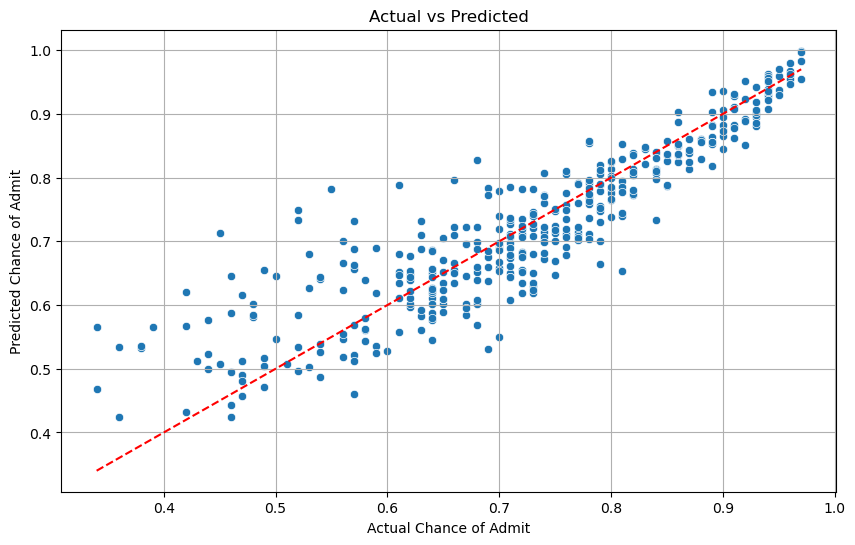

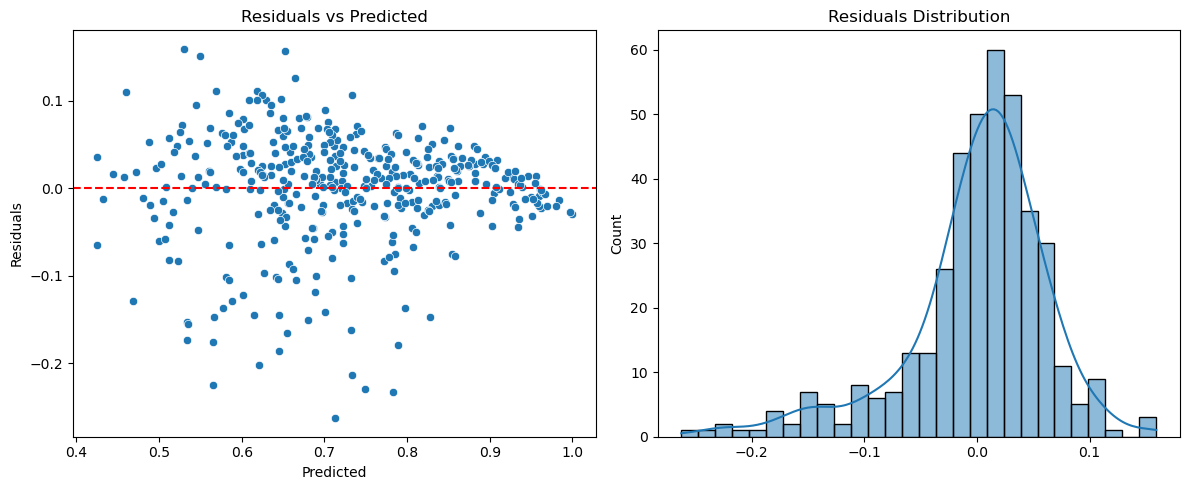

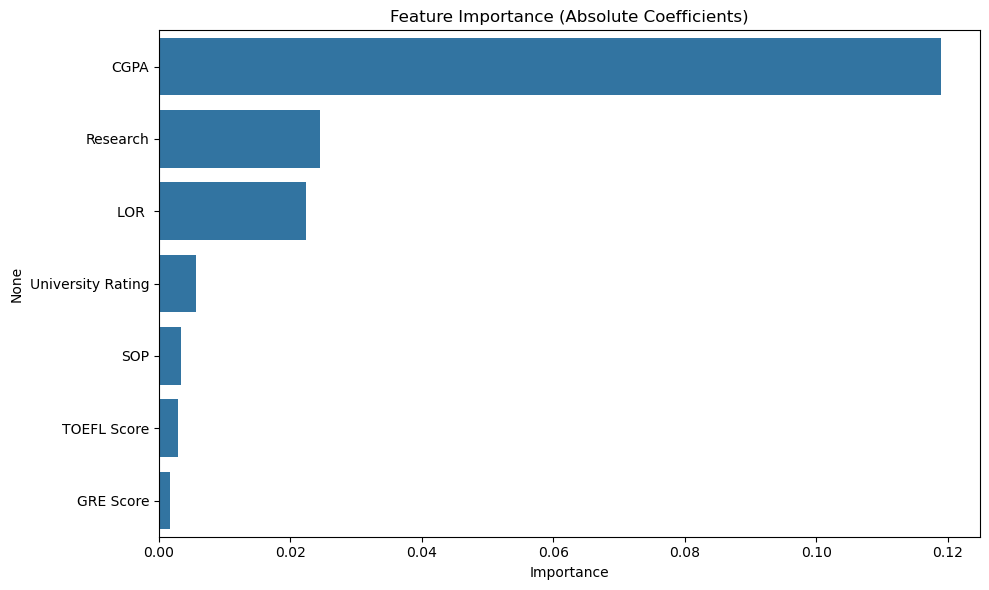


Predictions for New Data:
0    0.865839
1    0.682176
2    0.787943
dtype: float64


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class MultipleLinearRegression:
    def __init__(self, X, y):
        self.X_raw = X.copy()
        self.y = y.copy().values.reshape(-1, 1)
        ones = np.ones((self.X_raw.shape[0], 1))
        self.X = np.hstack((ones, self.X_raw.values))
        self.feature_names = ['Intercept'] + list(self.X_raw.columns)
        self.coefficients = None
        self.predictions = None

    def fit(self):
        XTX = np.dot(self.X.T, self.X)
        XTy = np.dot(self.X.T, self.y)
        self.coefficients = np.linalg.inv(XTX).dot(XTy)
        return pd.Series(self.coefficients.flatten(), index=self.feature_names)

    def predict(self, X_new=None):
        if self.coefficients is None:
            raise ValueError("Model not fitted. Call fit() first.")
        if X_new is None:
            X_new_array = self.X
        else:
            X_new = X_new.copy()
            ones = np.ones((X_new.shape[0], 1))
            X_new_array = np.hstack((ones, X_new.values))
        self.predictions = np.dot(X_new_array, self.coefficients)
        return pd.Series(self.predictions.flatten())

    def evaluate(self):
        if self.predictions is None:
            self.predict()

        y_true = self.y.flatten()
        y_pred = self.predictions.flatten()

        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)

        r2 = 1 - (ss_res / ss_tot)
        mse = ss_res / len(y_true)

        return {'R-squared': r2, 'MSE': mse}

    def plot_actual_vs_predicted(self):
        if self.predictions is None:
            self.predict()
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=self.y.flatten(), y=self.predictions.flatten())
        plt.plot([self.y.min(), self.y.max()], [self.y.min(), self.y.max()], 'r--')
        plt.xlabel('Actual Chance of Admit')
        plt.ylabel('Predicted Chance of Admit')
        plt.title('Actual vs Predicted')
        plt.grid(True)
        plt.show()

    def plot_residuals(self):
        if self.predictions is None:
            self.predict()
        residuals = self.y.flatten() - self.predictions.flatten()
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.scatterplot(x=self.predictions.flatten(), y=residuals)
        plt.axhline(0, color='r', linestyle='--')
        plt.xlabel('Predicted')
        plt.ylabel('Residuals')
        plt.title('Residuals vs Predicted')
        plt.subplot(1, 2, 2)
        sns.histplot(residuals, kde=True)
        plt.title('Residuals Distribution')
        plt.tight_layout()
        plt.show()

    def plot_feature_importance(self):
        if self.coefficients is None:
            self.fit()
        coefs = pd.Series(np.abs(self.coefficients.flatten()[1:]), index=self.feature_names[1:])
        coefs.sort_values(ascending=False, inplace=True)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=coefs.values, y=coefs.index)
        plt.title('Feature Importance (Absolute Coefficients)')
        plt.xlabel('Importance')
        plt.tight_layout()
        plt.show()




reg_model_admission = MultipleLinearRegression(X, y)
coefficients_admission = reg_model_admission.fit()
print("Regression Coefficients:\n", coefficients_admission)

#predictions
predictions = reg_model_admission.predict()
print("\nSample Predictions:\n", predictions.head())

# evaluations
metrics = reg_model_admission.evaluate()
print("\nModel Performance:")
print(f"R-squared: {metrics['R-squared']:.4f}")
print(f"MSE: {metrics['MSE']:.4f}")

# plots
reg_model_admission.plot_actual_vs_predicted()
reg_model_admission.plot_residuals()
reg_model_admission.plot_feature_importance()

#predict new values
new_data = pd.DataFrame({
    'GRE Score': [330, 310, 320],
    'TOEFL Score': [115, 105, 110],
    'University Rating': [4, 3, 4],
    'SOP': [4.5, 3.0, 4.0],
    'LOR ': [4.0, 3.5, 4.0],
    'CGPA': [9.2, 8.5, 8.8],
    'Research': [1, 0, 1]
})
new_predictions = reg_model_admission.predict(new_data)
print("\nPredictions for New Data:")
print(new_predictions)

In [49]:
#Anova & Hypothsis test & Interval Estimation

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

class SimpleLinearRegression:
    def __init__(self):
        self.B_0 = None  # Intercept
        self.B_1 = None  # Slope
        self.MSE = None  # Mean Squared Error
        self.r_squared = None  # R²

    def fit(self, X, y):
        self.n = len(X)
        self.X = np.array(X)
        self.y = np.array(y)
        
        self.x_bar = self.X.mean()
        y_bar = self.y.mean()
        
        self.SXX = np.sum(self.X**2) - self.n * self.x_bar**2
        SXY = np.sum(self.X * self.y) - self.n * self.x_bar * y_bar
        
        self.B_1 = SXY / self.SXX
        self.B_0 = y_bar - self.B_1 * self.x_bar

        y_hat = self.predict(self.X)
        e = self.y - y_hat
        self.SSE = np.sum(e**2)
        self.MSE = self.SSE / (self.n - 2)

        self.SST = np.sum((self.y - y_bar) ** 2)
        self.SSR = np.sum((y_hat - y_bar) ** 2)
        self.r_squared = self.SSR / self.SST

    def predict(self, X):
        if self.B_0 is None or self.B_1 is None:
            raise ValueError("Model not yet fitted.")
        X = np.array(X)
        return self.B_0 + self.B_1 * X

    def plot(self, X, y):
        if self.B_0 is None or self.B_1 is None:
            raise ValueError("Model not yet fitted.")
        X = np.array(X)
        y = np.array(y)
        y_pred = self.predict(X)

        plt.scatter(X, y, color='blue', label='Data')
        plt.plot(X, y_pred, color='red', label='Regression line')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.title(f'y = {round(self.B_0, 2)} + {round(self.B_1, 2)}x')
        plt.legend()
        plt.grid(True)
        plt.show()

    def anova_table(self):
        if self.B_0 is None or self.B_1 is None:
            raise ValueError("Model not yet fitted.")

        self.df_regression = 1
        self.df_error = self.n - 2
        df_total = self.n - 1

        MSR = self.SSR / self.df_regression
        MSE = self.SSE / self.df_error
        self.F_stat = MSR / MSE

        table = pd.DataFrame({
            'Source': ['Regression', 'Error', 'Total'],
            'Sum of Squares': [self.SSR, self.SSE, self.SST],
            'Degrees of Freedom': [self.df_regression, self.df_error, df_total],
            'Mean Square': [MSR, MSE, ''],
            'F-Statistic': [self.F_stat, '', '']
        })
        return table

    def hypothesis_test(self, alpha=0.05):
        F_c = scipy.stats.f.ppf(1 - alpha, self.df_regression, self.df_error)

        if self.F_stat > F_c:
            conclusion = ("Reject H₀: Significant relationship exists between x and y.")
        else:
            conclusion = ("Fail to reject H₀: No significant relationship between x and y.")

        print("="*50)
        print("Hypothesis Testing (F-test for B₁ ≠ 0)")
        print("="*50)
        print(f"H₀: B₁ = 0")
        print(f"H₁: B₁ ≠ 0")
        print(f"F-statistic: {self.F_stat:.4f}")
        print(f"Critical value (F_c): {F_c:.4f}")
        print(f"Conclusion: {conclusion}")
        print("="*50)

    def interval_estimation(self, alpha=0.05, sigma=None):
        if sigma is None:
            t = scipy.stats.t.ppf(1 - alpha/2, self.df_error)
            B_0_se = np.sqrt(self.MSE * ((1/self.n) + (self.x_bar**2 / self.SXX)))
            B_1_se = np.sqrt(self.MSE / self.SXX)
        else:
            z = scipy.stats.norm.ppf(1 - alpha/2)
            B_0_se = sigma * np.sqrt((1/self.n) + (self.x_bar**2 / self.SXX))
            B_1_se = sigma * np.sqrt(1 / self.SXX)
            t = z

        B_0_ci = [self.B_0 - t * B_0_se, self.B_0 + t * B_0_se]
        B_1_ci = [self.B_1 - t * B_1_se, self.B_1 + t * B_1_se]
        return B_0_ci, B_1_ci


In [51]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Feature: GRE Score vs Chance of Admit

Evaluation of the model
------------------------
Line of best fit is: y = -2.4361 + 0.01 x
Mean squared error (MSE): 0.0073
Coefficient of determination (R²): 0.6442

ANOVA Table
-----------
       Source  Sum of Squares  Degrees of Freedom Mean Square F-Statistic
0  Regression        5.227312                   1    5.227312  720.554243
1       Error        2.887319                 398    0.007255            
2       Total        8.114631                 399                        

Hypothesis Test
----------------
Hypothesis Testing (F-test for B₁ ≠ 0)
H₀: B₁ = 0
H₁: B₁ ≠ 0
F-statistic: 720.5542
Critical value (F_c): 3.8649
Conclusion: Reject H₀: Significant relationship exists between x and y.

Confidence Intervals (95%)
---------------------------
95% CI for B_0: [-2.6677000069981167, -2.204468482704379]
95% CI for B_1: [0.009245266768504274, 0.010706497282859712]


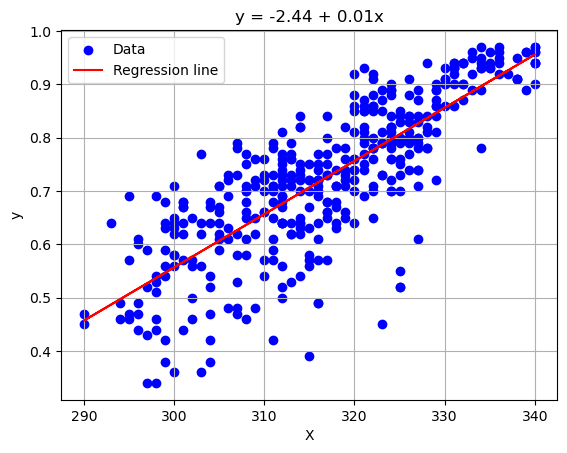




Feature: TOEFL Score vs Chance of Admit

Evaluation of the model
------------------------
Line of best fit is: y = -1.2734 + 0.0186 x
Mean squared error (MSE): 0.0076
Coefficient of determination (R²): 0.6266

ANOVA Table
-----------
       Source  Sum of Squares  Degrees of Freedom Mean Square F-Statistic
0  Regression        5.084799                   1    5.084799  667.941156
1       Error        3.029832                 398    0.007613            
2       Total        8.114631                 399                        

Hypothesis Test
----------------
Hypothesis Testing (F-test for B₁ ≠ 0)
H₀: B₁ = 0
H₁: B₁ ≠ 0
F-statistic: 667.9412
Critical value (F_c): 3.8649
Conclusion: Reject H₀: Significant relationship exists between x and y.

Confidence Intervals (95%)
---------------------------
95% CI for B_0: [-1.425607062486654, -1.1211938785448847]
95% CI for B_1: [0.017184486567347227, 0.020014107055514135]


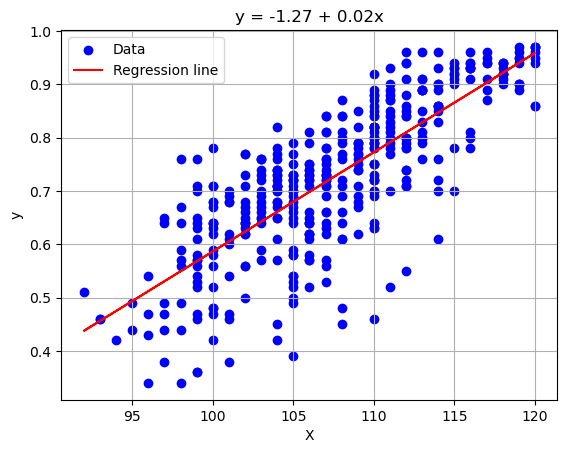




Feature: University Rating vs Chance of Admit

Evaluation of the model
------------------------
Line of best fit is: y = 0.4505 + 0.0887 x
Mean squared error (MSE): 0.0101
Coefficient of determination (R²): 0.5059

ANOVA Table
-----------
       Source  Sum of Squares  Degrees of Freedom Mean Square F-Statistic
0  Regression        4.105005                   1    4.105005  407.467332
1       Error        4.009626                 398    0.010074            
2       Total        8.114631                 399                        

Hypothesis Test
----------------
Hypothesis Testing (F-test for B₁ ≠ 0)
H₀: B₁ = 0
H₁: B₁ ≠ 0
F-statistic: 407.4673
Critical value (F_c): 3.8649
Conclusion: Reject H₀: Significant relationship exists between x and y.

Confidence Intervals (95%)
---------------------------
95% CI for B_0: [0.4221027977467315, 0.47897060663597685]
95% CI for B_1: [0.0800472894449614, 0.09732164840679303]


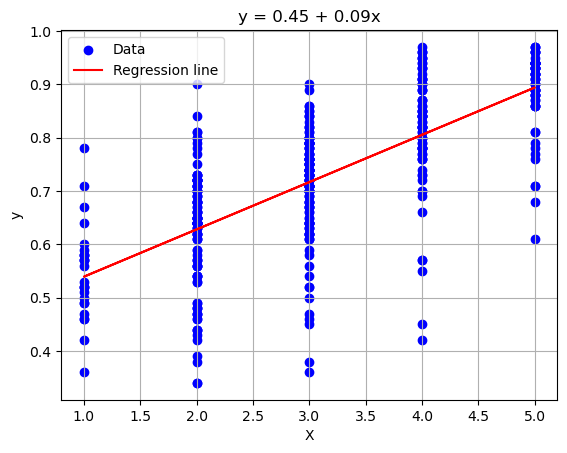




Feature: SOP vs Chance of Admit

Evaluation of the model
------------------------
Line of best fit is: y = 0.3989 + 0.0957 x
Mean squared error (MSE): 0.0111
Coefficient of determination (R²): 0.4566

ANOVA Table
-----------
       Source  Sum of Squares  Degrees of Freedom Mean Square F-Statistic
0  Regression        3.705250                   1     3.70525  334.443726
1       Error        4.409381                 398    0.011079            
2       Total        8.114631                 399                        

Hypothesis Test
----------------
Hypothesis Testing (F-test for B₁ ≠ 0)
H₀: B₁ = 0
H₁: B₁ ≠ 0
F-statistic: 334.4437
Critical value (F_c): 3.8649
Conclusion: Reject H₀: Significant relationship exists between x and y.

Confidence Intervals (95%)
---------------------------
95% CI for B_0: [0.36246241566818127, 0.4354212678917718]
95% CI for B_1: [0.08541962300992514, 0.10599694064891221]


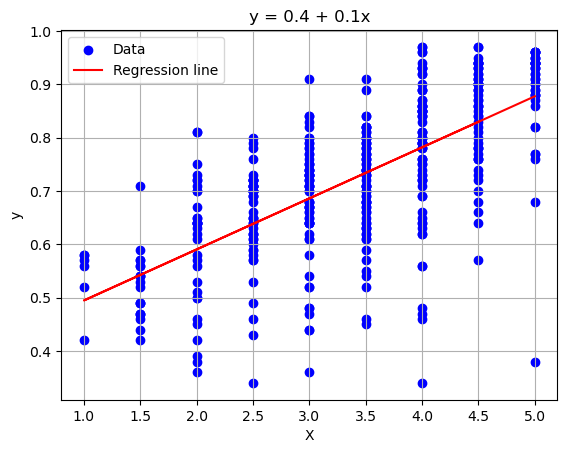




Feature: LOR vs Chance of Admit

Evaluation of the model
------------------------
Line of best fit is: y = 0.3573 + 0.1063 x
Mean squared error (MSE): 0.0112
Coefficient of determination (R²): 0.4488

ANOVA Table
-----------
       Source  Sum of Squares  Degrees of Freedom Mean Square F-Statistic
0  Regression        3.641449                   1    3.641449  323.996766
1       Error        4.473182                 398    0.011239            
2       Total        8.114631                 399                        

Hypothesis Test
----------------
Hypothesis Testing (F-test for B₁ ≠ 0)
H₀: B₁ = 0
H₁: B₁ ≠ 0
F-statistic: 323.9968
Critical value (F_c): 3.8649
Conclusion: Reject H₀: Significant relationship exists between x and y.

Confidence Intervals (95%)
---------------------------
95% CI for B_0: [0.3158301728176994, 0.3986821254770709]
95% CI for B_1: [0.09471398142476936, 0.11793995100252386]


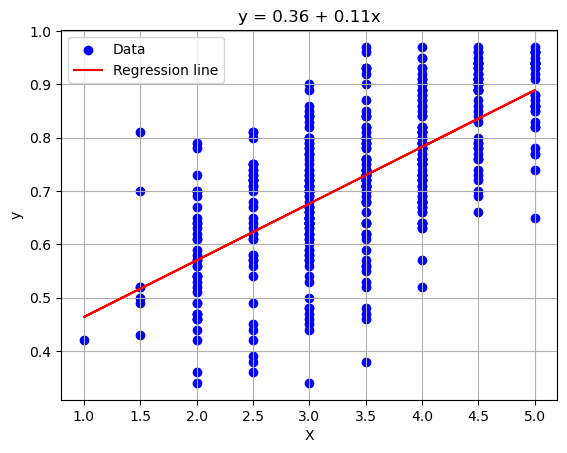




Feature: CGPA vs Chance of Admit

Evaluation of the model
------------------------
Line of best fit is: y = -1.0715 + 0.2088 x
Mean squared error (MSE): 0.0048
Coefficient of determination (R²): 0.7626

ANOVA Table
-----------
       Source  Sum of Squares  Degrees of Freedom Mean Square  F-Statistic
0  Regression        6.188492                   1    6.188492  1278.734453
1       Error        1.926139                 398     0.00484             
2       Total        8.114631                 399                         

Hypothesis Test
----------------
Hypothesis Testing (F-test for B₁ ≠ 0)
H₀: B₁ = 0
H₁: B₁ ≠ 0
F-statistic: 1278.7345
Critical value (F_c): 3.8649
Conclusion: Reject H₀: Significant relationship exists between x and y.

Confidence Intervals (95%)
---------------------------
95% CI for B_0: [-1.1704791757323023, -0.9725441501361157]
95% CI for B_1: [0.19736544721550564, 0.22032901178587166]


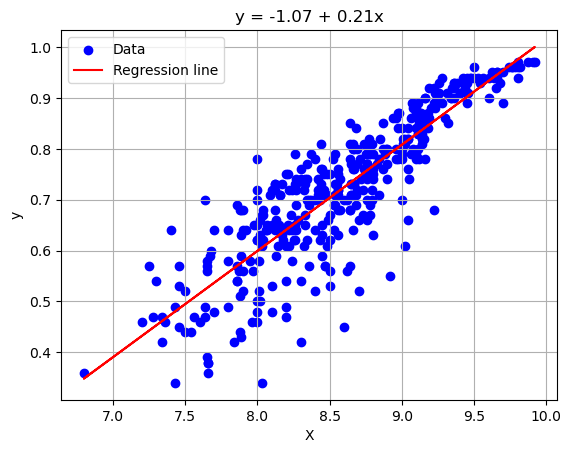




Feature: Research vs Chance of Admit

Evaluation of the model
------------------------
Line of best fit is: y = 0.6377 + 0.1583 x
Mean squared error (MSE): 0.0141
Coefficient of determination (R²): 0.306

ANOVA Table
-----------
       Source  Sum of Squares  Degrees of Freedom Mean Square F-Statistic
0  Regression        2.483342                   1    2.483342  175.513976
1       Error        5.631289                 398    0.014149            
2       Total        8.114631                 399                        

Hypothesis Test
----------------
Hypothesis Testing (F-test for B₁ ≠ 0)
H₀: B₁ = 0
H₁: B₁ ≠ 0
F-statistic: 175.5140
Critical value (F_c): 3.8649
Conclusion: Reject H₀: Significant relationship exists between x and y.

Confidence Intervals (95%)
---------------------------
95% CI for B_0: [0.620297793161, 0.6550613228610994]
95% CI for B_1: [0.13481116072530988, 0.1817931935722256]


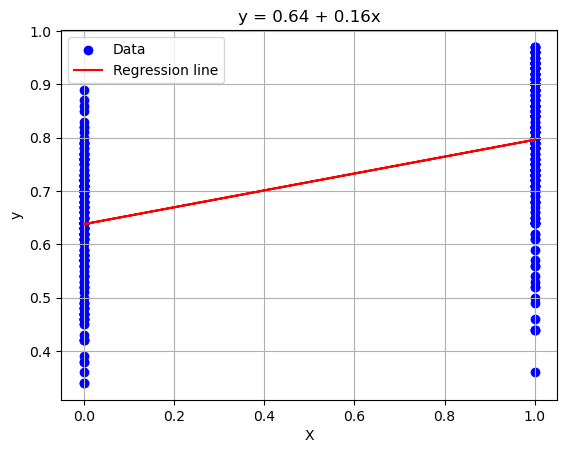

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Clean column names to remove any leading/trailing spaces
df.columns = df.columns.str.strip()

# List of columns you want to exclude from features
excluded_columns = ['Chance of Admit', 'Serial No.']

# Get all features except the excluded columns
features = [col for col in df.columns if col not in excluded_columns]
response_column = 'Chance of Admit'

# Loop through each feature and run the model
for feature in features:
    print("="*70)
    print(f"Feature: {feature} vs {response_column}")
    print("="*70)
    
    x = df[feature]
    y = df[response_column]
    
    # Initialize your SimpleLinearRegression model here
    model = SimpleLinearRegression()
    model.fit(x, y)

    # Evaluation
    print("\nEvaluation of the model")
    print("------------------------")
    print(f'Line of best fit is: y = {round(model.B_0, 4)} + {round(model.B_1, 4)} x')
    print(f'Mean squared error (MSE): {round(model.MSE, 4)}')
    print(f'Coefficient of determination (R²): {round(model.r_squared, 4)}')

    # ANOVA Table
    print("\nANOVA Table")
    print("-----------")
    print(model.anova_table())

    # Hypothesis Test
    print("\nHypothesis Test")
    print("----------------")
    model.hypothesis_test(alpha=0.05)

    # Confidence Intervals
    print("\nConfidence Intervals (95%)")
    print("---------------------------")
    

    #B_0_est, B_1_est = model.interval_estimation(sigma=x.std())
    B_0_est, B_1_est = model.interval_estimation()
    print(f"95% CI for B_0: {B_0_est}")
    print(f"95% CI for B_1: {B_1_est}")
    
    # Optional: Plot regression
    model.plot(x, y)

    print("\n\n")


